In [1]:
from Data_scrapping import get_data_about_option
from blackscholes import BlackScholes, call_price, call_iv
from cev import CEV
from heston import Heston
from sabr import SABR
from svi import SVI
import pandas as pd
from Computing_IV import get_Implied_volatility, black_delta_formula
import matplotlib.pyplot as plt
import numpy as np
from Graphs import lines_3D, lines_2D_SVI, error_graph_3D, lines_2D_total_varience
import os as os
from datetime import datetime
from pathlib import Path
from IV_via_stochastic_model import get_IV_from_stochastic_model
from check_static_arbitrage import get_g_function_for_butterfly_arbitrage
from Functions_for_extrapolation import get_jump_wing_param, get_curvature, get_skew, get_SVI_extrapolation, lines_2D_SVI_example, get_grids_for_volatility_surface, lines_2D_SVI_for_interpolate, get_w_SVI_raw

In [2]:
ticker_set = ['AAPL', '^SPX','MSFT','NVDA','AVGO','ORCL', 'CSCO', 'CRM','TXN','ADBE','QCOM','INTC','IBM','AMZN','TSLA', 'HD','MCD','NKE','LOW', 'GOOG', 'META','TMUS','DIS','NFLX','VZ', 'CMCSA','T', 'XOM', 'CVX', 'COP', 'BRK-B', 'V', 'JPM', 'MA', 'BAC','WFC','SCHW','MS','UNH', 'JNJ', 'PFE', 'ABBV', 'MRK', 'TMO', 'ABT', 'BMY', 'CVS', 'WMT', 'PG', 'KO', 'PEP', 'COST', 'PM', 'UPS', 'RTX', 'HON', 'NEE']
ticker_set = ['AAPl']
time = datetime(2024, 6, 4, 0, 2, 26, 306861)
# create the necessary folders
Path('DATA').mkdir(parents=True, exist_ok=True)
Path('DATA//Option_chain').mkdir(parents=True, exist_ok=True)
directory = 'DATA//Option_chain//' + str(datetime.now().date()) + '_' + str(datetime.now().hour) + '-' + str(datetime.now().minute)
Path(directory).mkdir(parents=True, exist_ok=True)

# retrieve data about option chain and save it
for ticker_ in ticker_set:
    data_options = get_data_about_option(ticker_, time, directory)

AAPl


In [3]:
ticker = 'TSLA'
data_date = "2024-06-04_23-59"
filename_for_option_chain = "DATA\\Option_chain\\" + data_date + "\\" + ticker + ".csv"
filename_for_discount_curve = "DATA\\Discount_curve\\" + data_date + "\\Forward_SOFR_curve.xlsx"
options_data = pd.read_csv(filename_for_option_chain)
# options_data = data_options
discount_curve = pd.read_excel(filename_for_discount_curve)

In [4]:
expiry_date_list=options_data["expiryDate"].unique()
print(expiry_date_list)

['2024-06-07' '2024-06-14' '2024-06-21' '2024-06-28' '2024-07-05'
 '2024-07-12' '2024-07-19' '2024-08-16' '2024-09-20' '2024-10-18'
 '2024-11-15' '2024-12-20' '2025-01-17' '2025-03-21' '2025-06-20'
 '2025-09-19' '2025-12-19' '2026-01-16' '2026-06-18' '2026-12-18']


In [5]:
for expiry_date in expiry_date_list:
    options_at_given_expiry_yf_pddf = options_data.loc[options_data["expiryDate"]==expiry_date]
    print("Number of different contracts traded on",data_date, "for contracts expiring on", expiry_date, ":", len(options_at_given_expiry_yf_pddf))

Number of different contracts traded on 2024-06-04_23-59 for contracts expiring on 2024-06-07 : 88
Number of different contracts traded on 2024-06-04_23-59 for contracts expiring on 2024-06-14 : 94
Number of different contracts traded on 2024-06-04_23-59 for contracts expiring on 2024-06-21 : 157
Number of different contracts traded on 2024-06-04_23-59 for contracts expiring on 2024-06-28 : 58
Number of different contracts traded on 2024-06-04_23-59 for contracts expiring on 2024-07-05 : 53
Number of different contracts traded on 2024-06-04_23-59 for contracts expiring on 2024-07-12 : 42
Number of different contracts traded on 2024-06-04_23-59 for contracts expiring on 2024-07-19 : 87
Number of different contracts traded on 2024-06-04_23-59 for contracts expiring on 2024-08-16 : 86
Number of different contracts traded on 2024-06-04_23-59 for contracts expiring on 2024-09-20 : 96
Number of different contracts traded on 2024-06-04_23-59 for contracts expiring on 2024-10-18 : 61
Number of

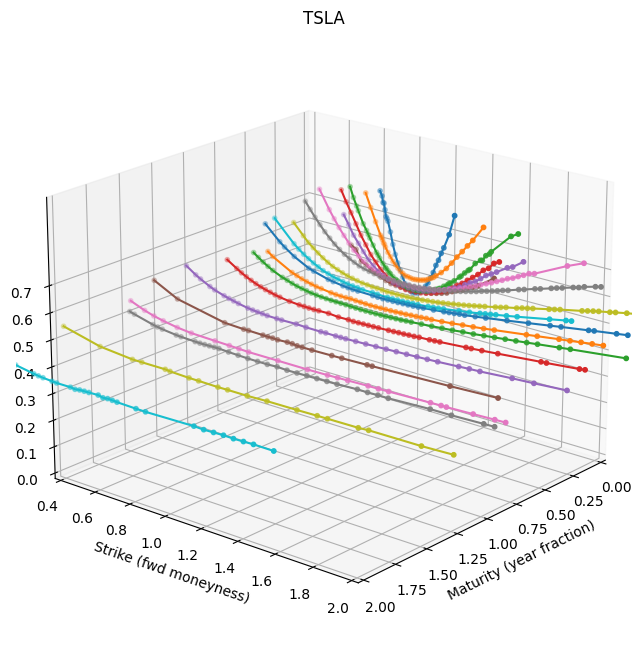

In [6]:
# computed IV via Black-76
Implied_Volatility = get_Implied_volatility(options_data, discount_curve)
lines_3D(ticker,Implied_Volatility)

In [7]:
# computed IV via CEV, Heston, SABR, SVI
Implied_Volatility_via_stochastic_model = get_IV_from_stochastic_model(Implied_Volatility, log=True)

Expiration = 2024-06-07
SVI_iv have computed
Heston_iv have computed
SABR_iv have computed
Expiration = 2024-06-14
SVI_iv have computed
Heston_iv have computed
SABR_iv have computed
Expiration = 2024-06-21
SVI_iv have computed
Heston_iv have computed
SABR_iv have computed
Expiration = 2024-06-28
SVI_iv have computed
Heston_iv have computed
SABR_iv have computed
Expiration = 2024-07-05
SVI_iv have computed
Heston_iv have computed
SABR_iv have computed
Expiration = 2024-07-12
SVI_iv have computed
Heston_iv have computed
SABR_iv have computed
Expiration = 2024-07-19
SVI_iv have computed
Heston_iv have computed
SABR_iv have computed
Expiration = 2024-08-16
SVI_iv have computed
Heston_iv have computed
SABR_iv have computed
Expiration = 2024-09-20
SVI_iv have computed
Heston_iv have computed
SABR_iv have computed
Expiration = 2024-10-18
SVI_iv have computed
Heston_iv have computed
SABR_iv have computed
Expiration = 2024-11-15
SVI_iv have computed
CEV_iv have computed
Heston_iv have computed


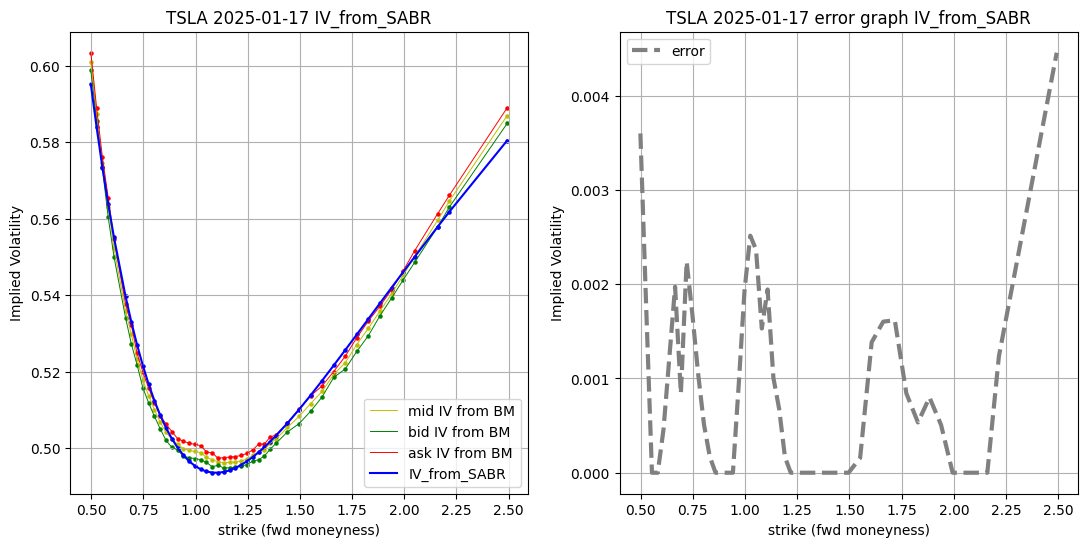

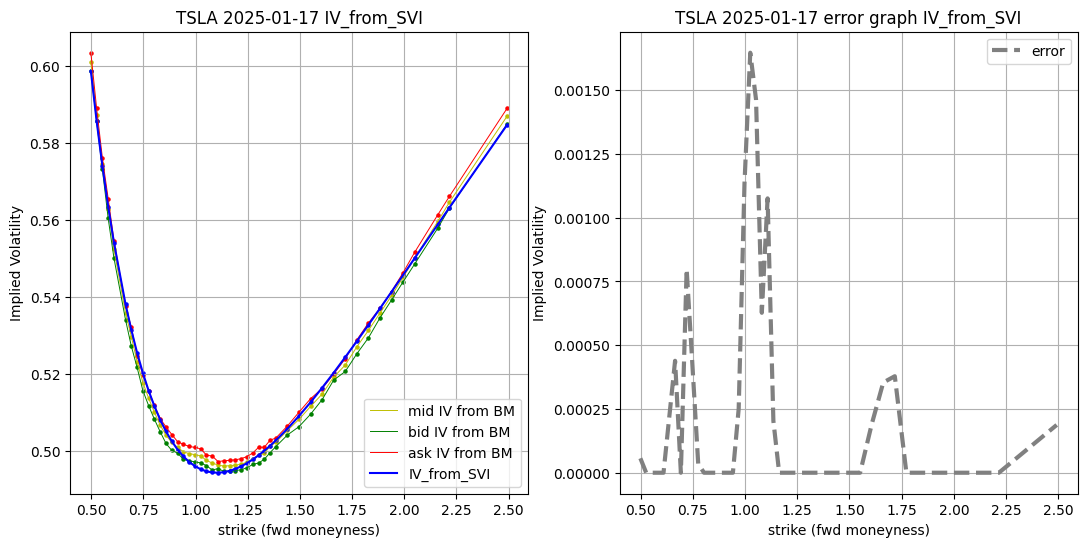

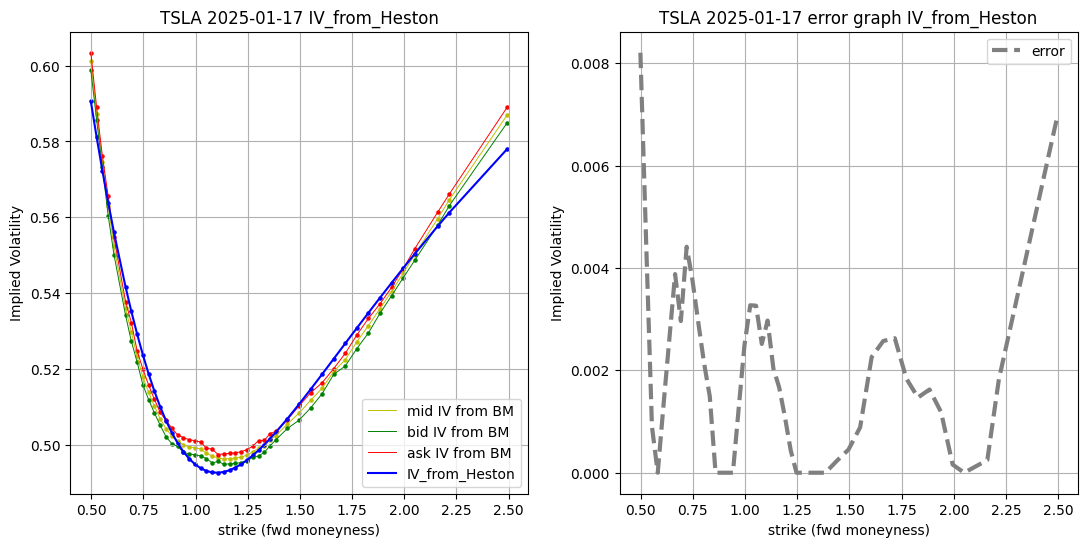

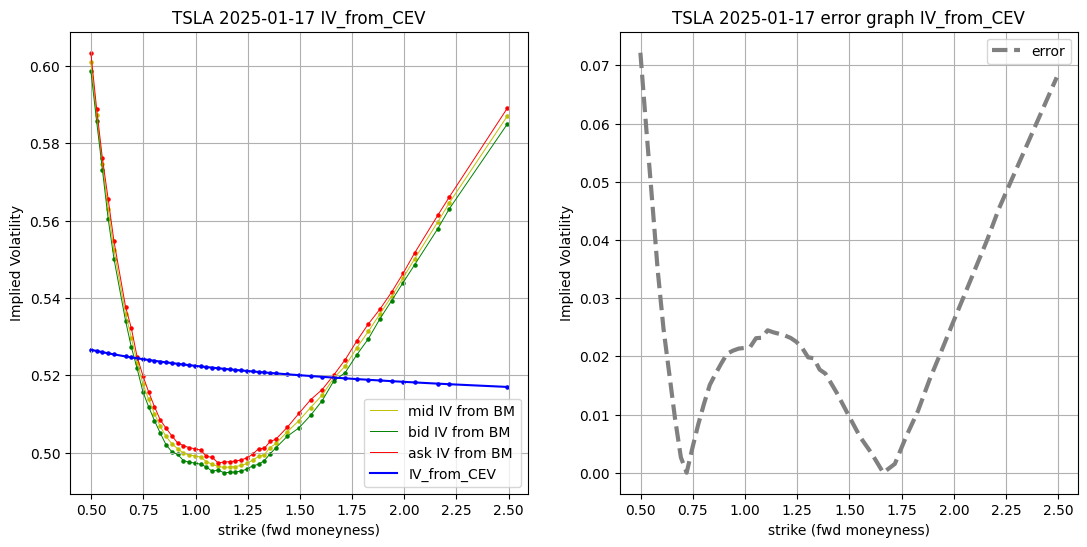

In [8]:
expire_date_number = 12
lines_2D_SVI(ticker, Implied_Volatility_via_stochastic_model, 'IV_from_SABR', expire_date_number)
lines_2D_SVI(ticker, Implied_Volatility_via_stochastic_model, 'IV_from_SVI', expire_date_number)
lines_2D_SVI(ticker, Implied_Volatility_via_stochastic_model, 'IV_from_Heston', expire_date_number)
lines_2D_SVI(ticker, Implied_Volatility_via_stochastic_model, 'IV_from_CEV', expire_date_number)

In [9]:
data_initial = Implied_Volatility['implied_volatility_surface'][10]
time = data_initial['expiry_date_in_act365_year_fraction']
F = data_initial['reference_forward']
DF = data_initial['reference_discount_factor']
strikes = np.array(data_initial['strikes'])
mid_IV = np.array(data_initial['mid_implied_volatilities'])
s= Implied_Volatility['reference_spot']

In [10]:
# checking the speed of the algorithm

In [11]:
Heston_IV = Heston(s=s,v=0.25,kappa=0.1, theta=0.2, sigma=0.3, rho=0.4, r = (1/DF-1))
%timeit Heston_IV.calibrate(t=time,k = strikes,iv = mid_IV, s = s)

643 ms ± 2.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
CEV_IV = CEV_IV = CEV(s = s, sigma=0.3, beta=0.8, r = (1/DF-1))
%timeit CEV_IV.calibrate(t=time,k = strikes,iv = mid_IV, s = s)

3.3 s ± 71.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
SABR_IV = SABR(s=s,alpha=0.1, beta = 0.1, rho = 0.1, nu = 0.1)
%timeit SABR_IV.calibrate(t=time,k = strikes,iv = mid_IV, s = s)

36.9 ms ± 64.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
from Computing_option_prices import get_option_prices

In [15]:
# compute price option via model and compare them with initial bid ask spread
option_price_data_Heston = get_option_prices(Implied_Volatility_via_stochastic_model, options_data, 'IV_from_Heston', optionTypes=None, log=True)
option_price_data_SVI = get_option_prices(Implied_Volatility_via_stochastic_model, options_data, 'IV_from_SVI', optionTypes=None, log=True)
option_price_data_SABR = get_option_prices(Implied_Volatility_via_stochastic_model, options_data, 'IV_from_SABR', optionTypes=None, log=True)

Expiration = 2024-06-07
Heston_iv have computed
Expiration = 2024-06-14
Heston_iv have computed
Expiration = 2024-06-21
Heston_iv have computed
Expiration = 2024-06-28
Heston_iv have computed
Expiration = 2024-07-05
Heston_iv have computed
Expiration = 2024-07-12
Heston_iv have computed
Expiration = 2024-07-19
Heston_iv have computed
Expiration = 2024-08-16
Heston_iv have computed
Expiration = 2024-09-20
Heston_iv have computed
Expiration = 2024-10-18
Heston_iv have computed
Expiration = 2024-11-15
Heston_iv have computed
Expiration = 2024-12-20
Heston_iv have computed
Expiration = 2025-01-17
Heston_iv have computed
Expiration = 2025-03-21
Heston_iv have computed
Expiration = 2025-06-20
Heston_iv have computed
Expiration = 2025-09-19
Heston_iv have computed
Expiration = 2025-12-19
Heston_iv have computed
Expiration = 2026-01-16
Heston_iv have computed
Expiration = 2026-06-18
Heston_iv have computed
Expiration = 2026-12-18
Heston_iv have computed
Expiration = 2024-06-07
SVI_iv have comp

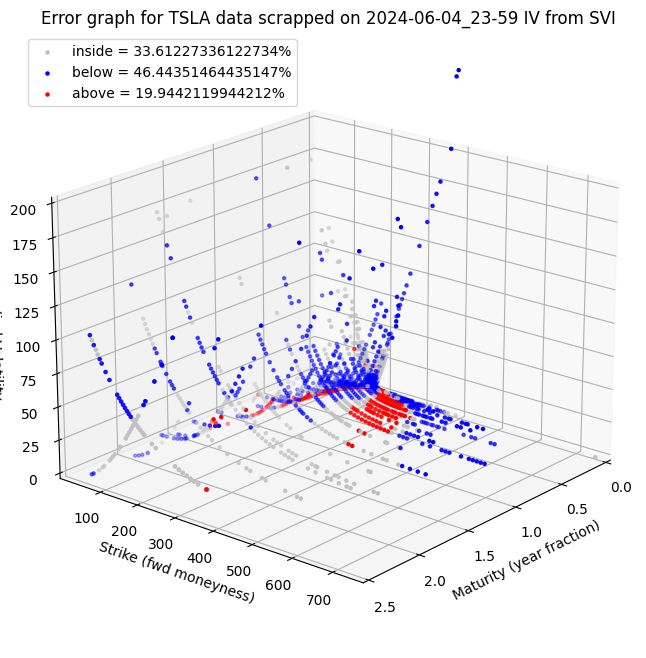

In [16]:
error_graph_3D(option_price_data_Heston, ticker, data_date, type_option=None)

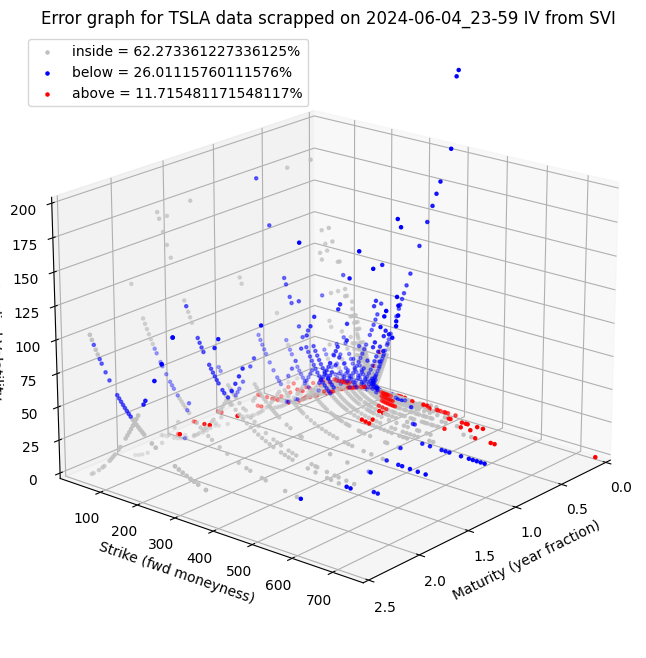

In [17]:
error_graph_3D(option_price_data_SVI, ticker, data_date, type_option=None)

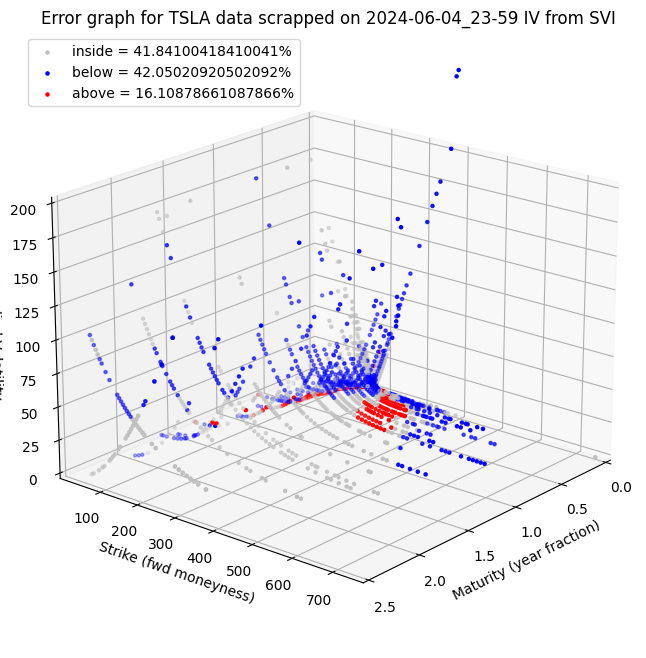

In [18]:
error_graph_3D(option_price_data_SABR, ticker, data_date, type_option=None)

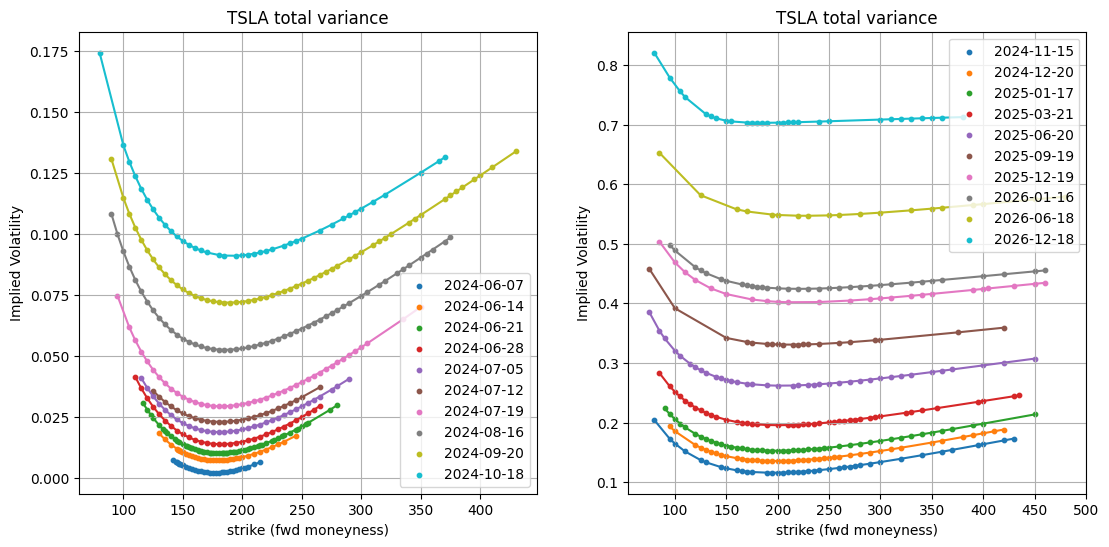

In [19]:
# check calender arbitrage
lines_2D_total_varience(ticker, Implied_Volatility_via_stochastic_model, 10,interpolation=False)

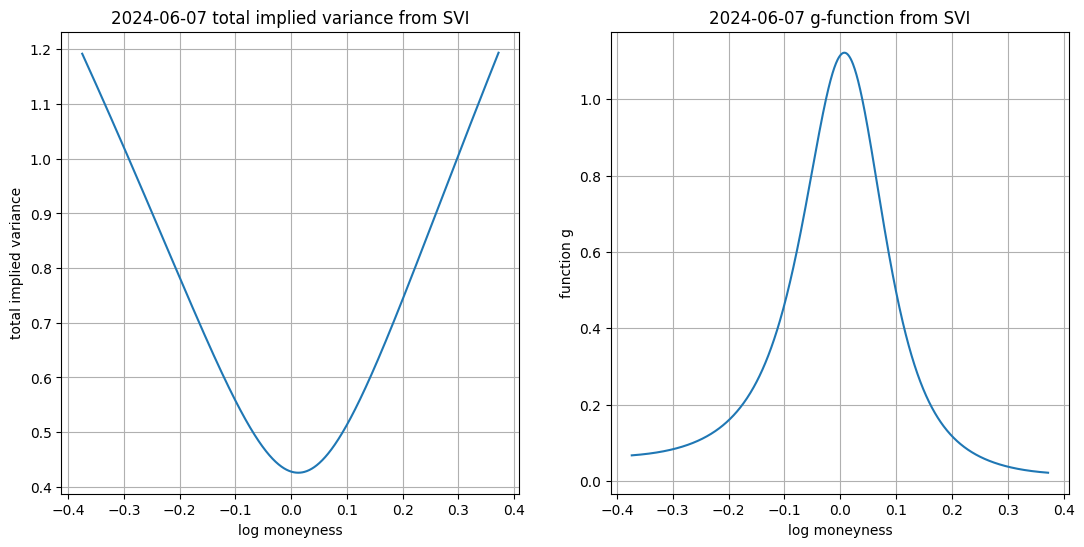

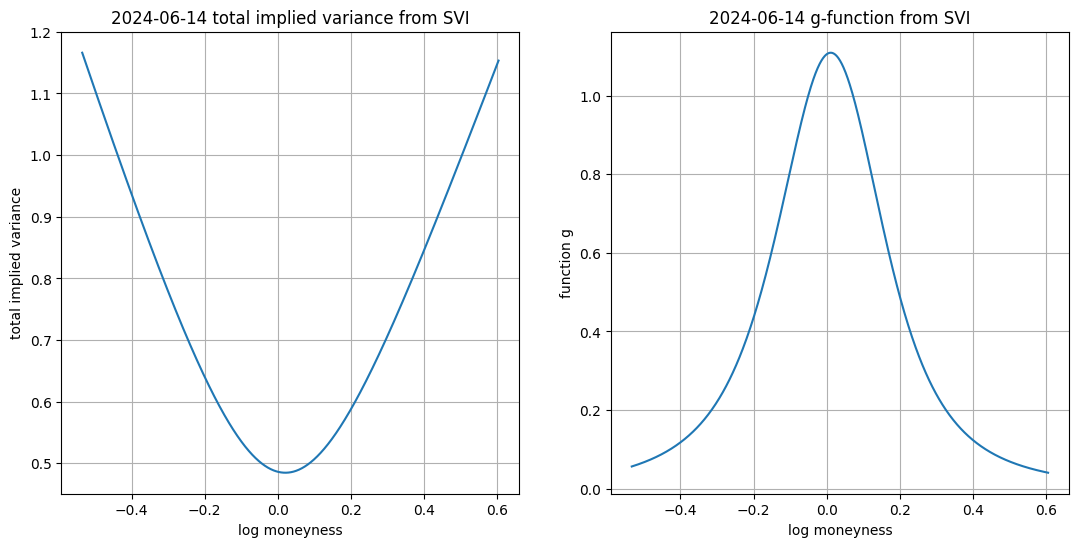

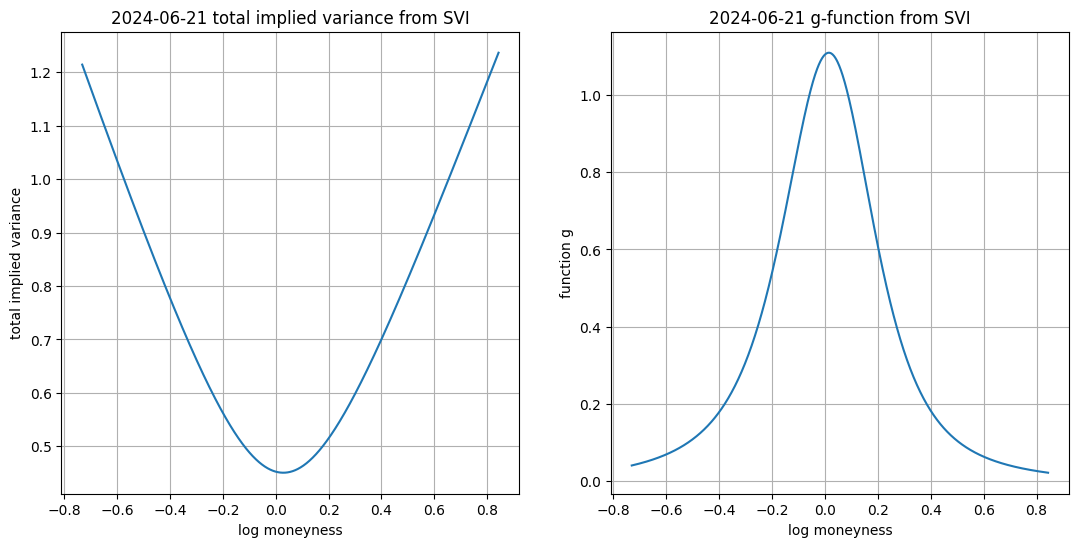

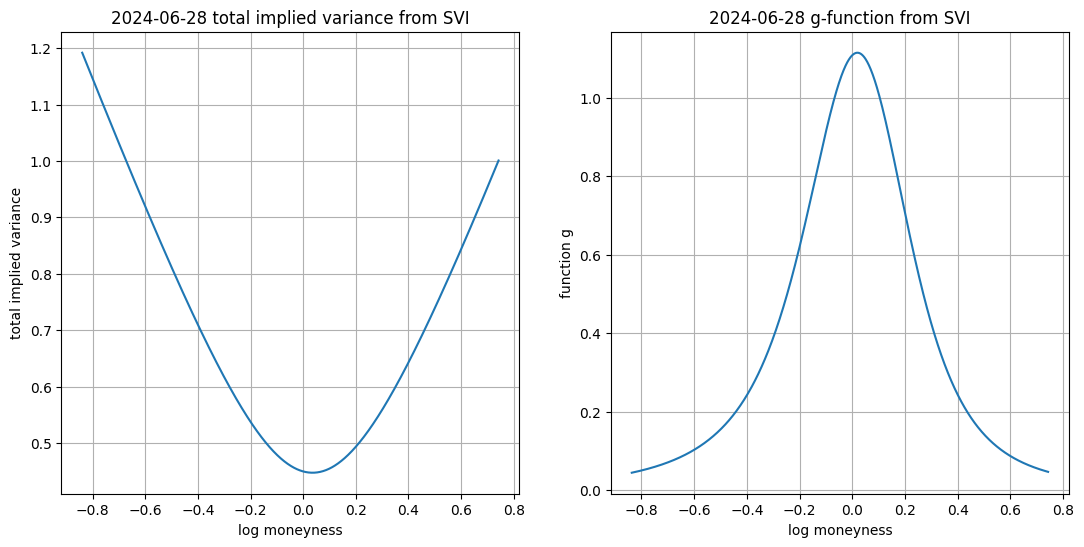

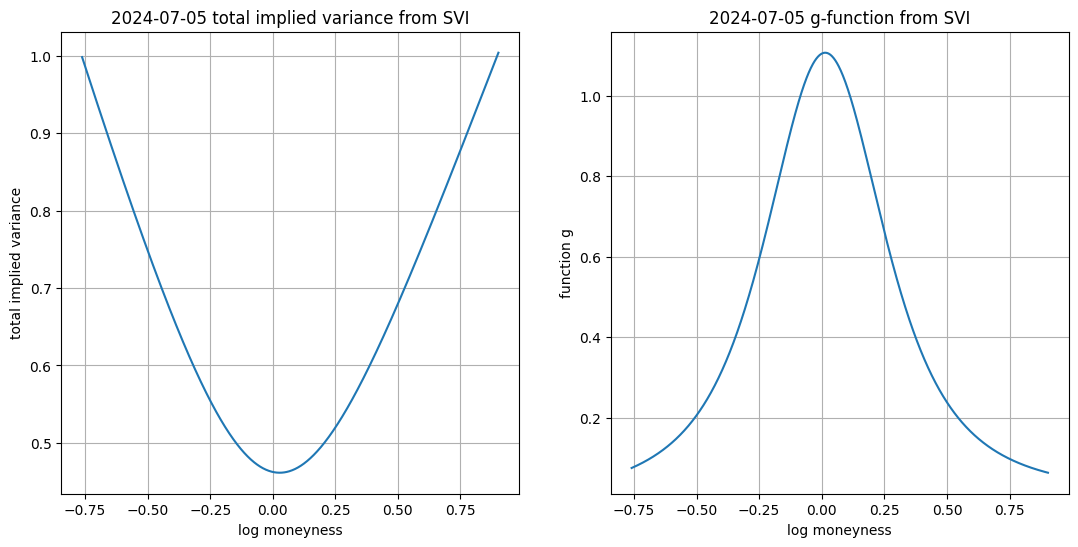

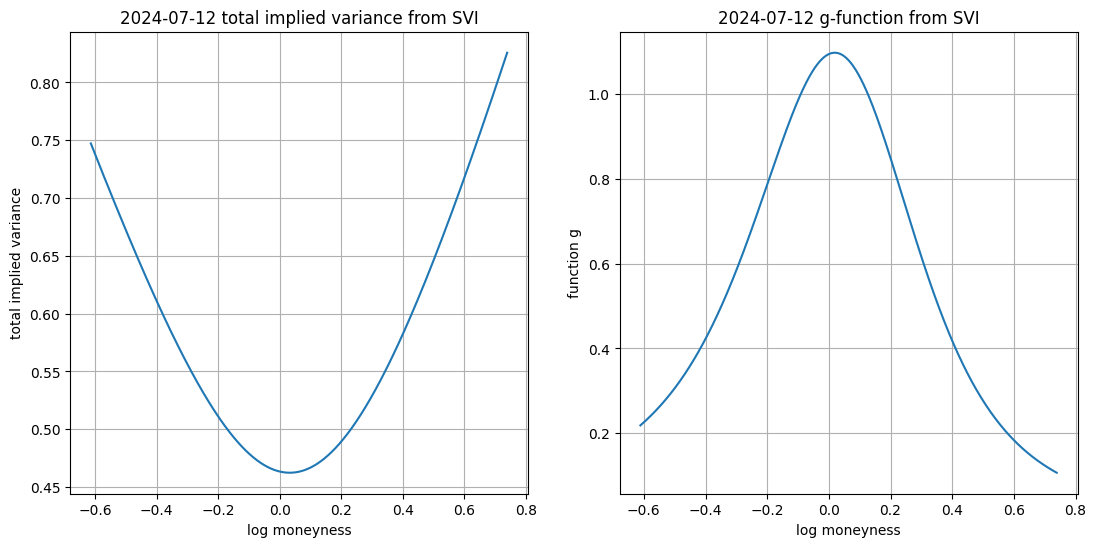

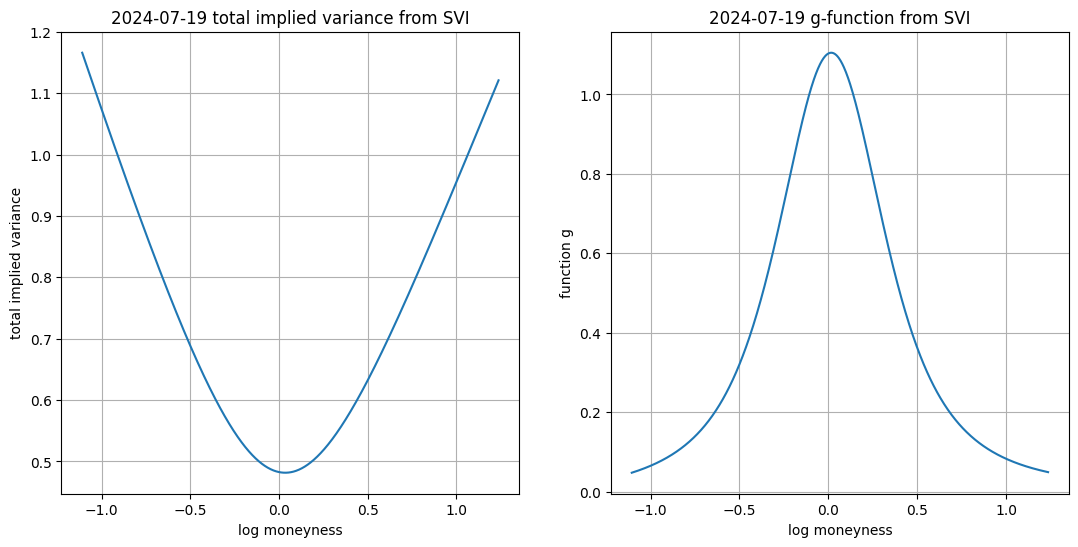

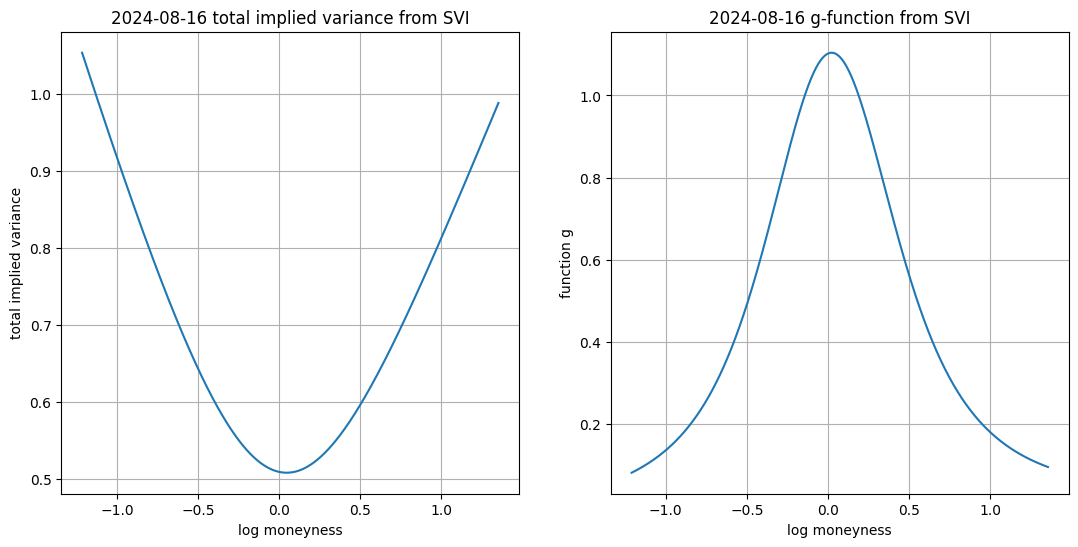

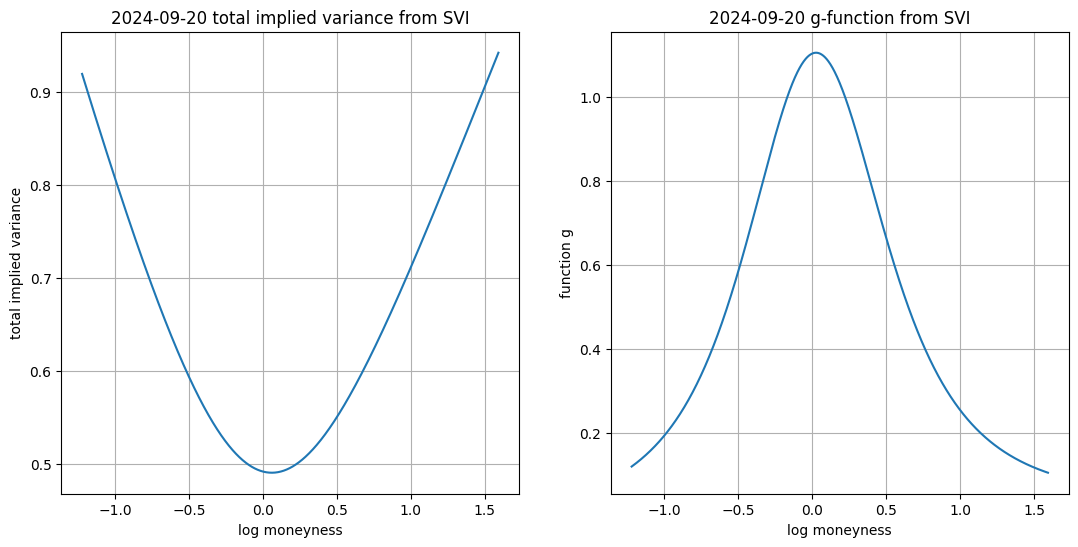

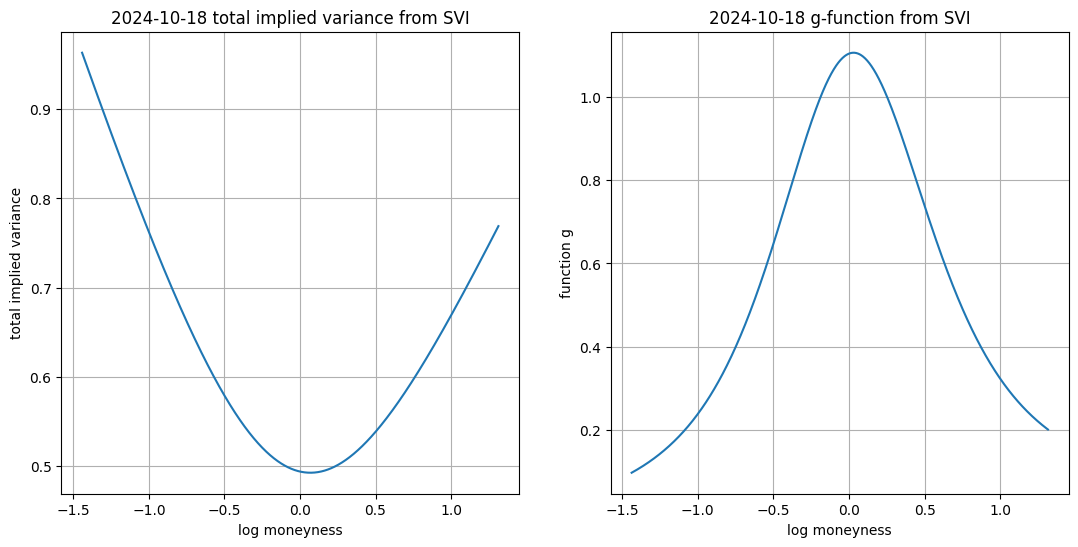

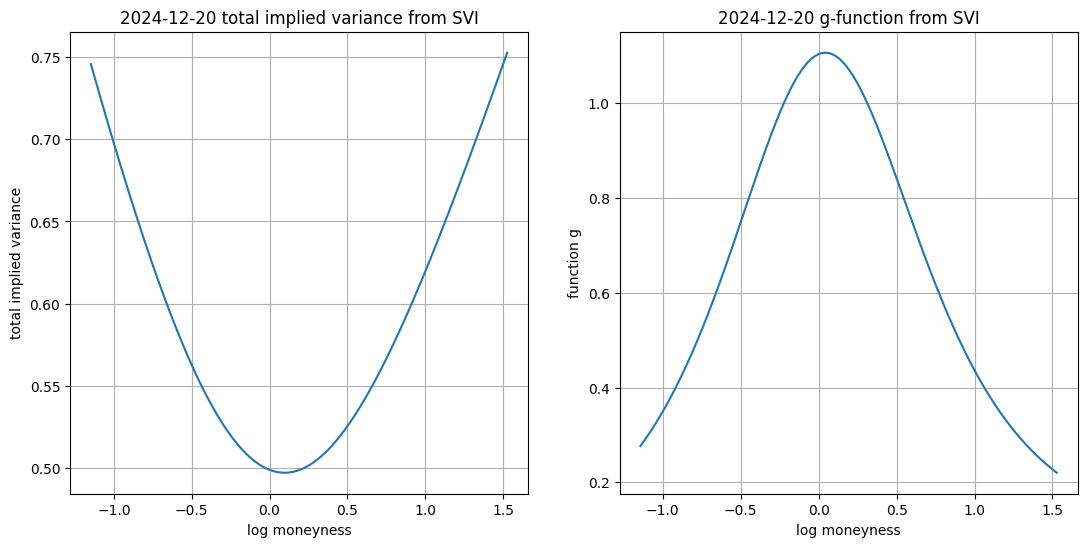

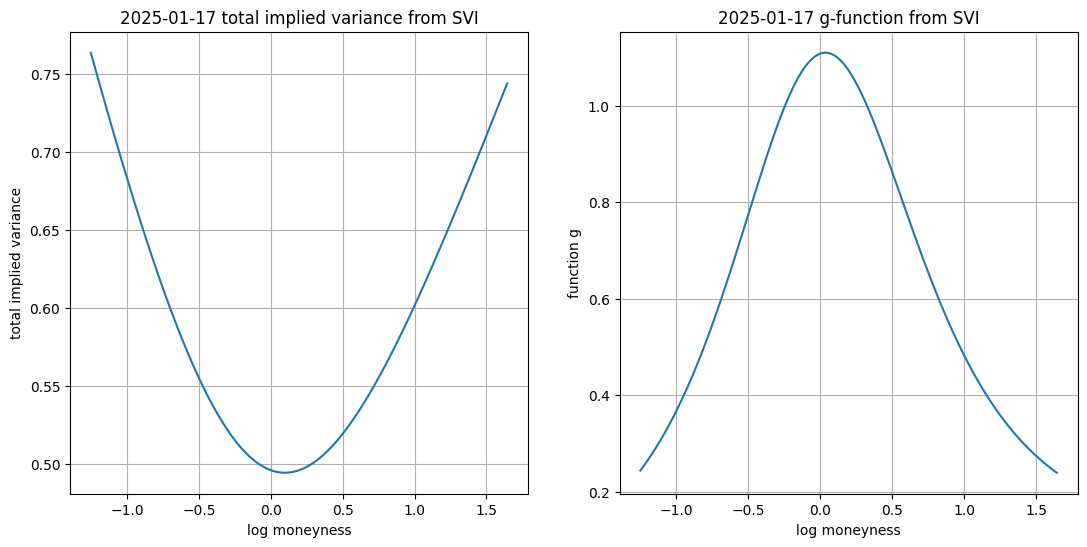

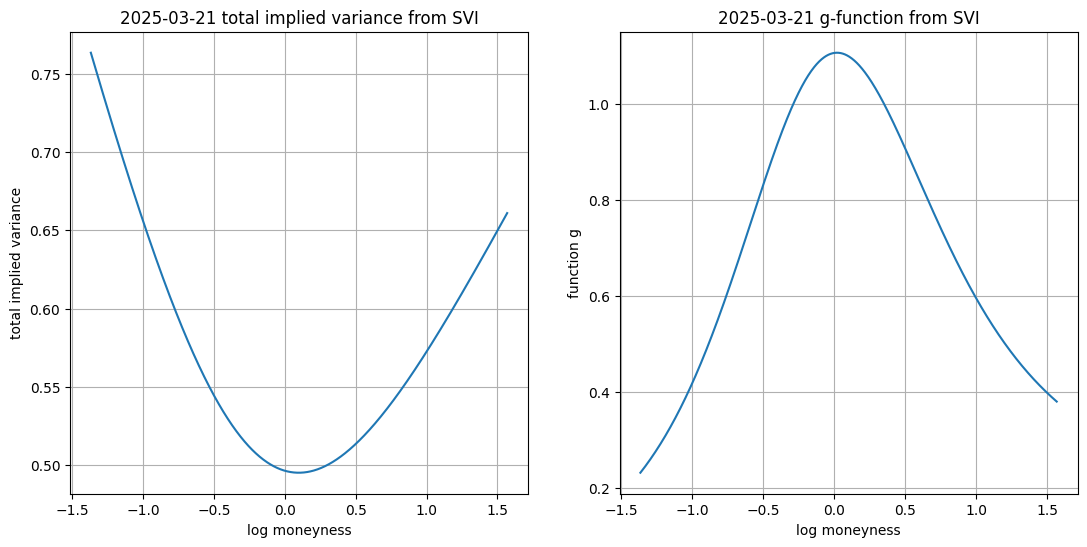

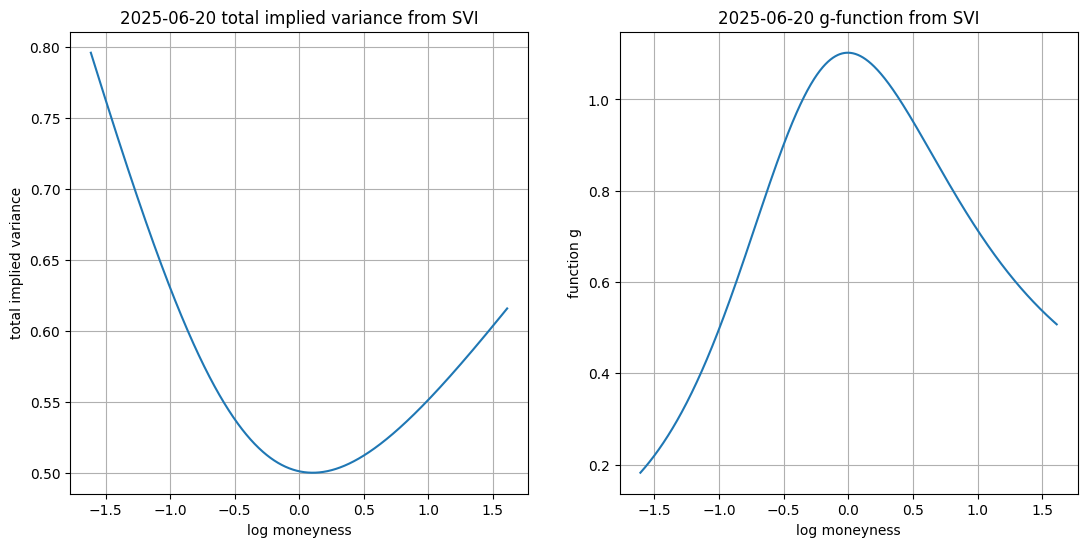

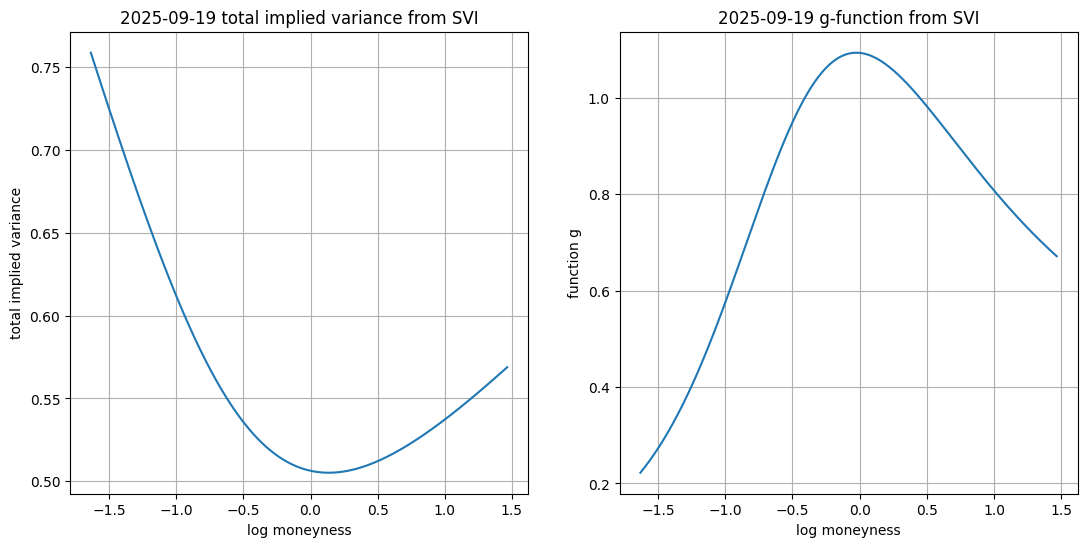

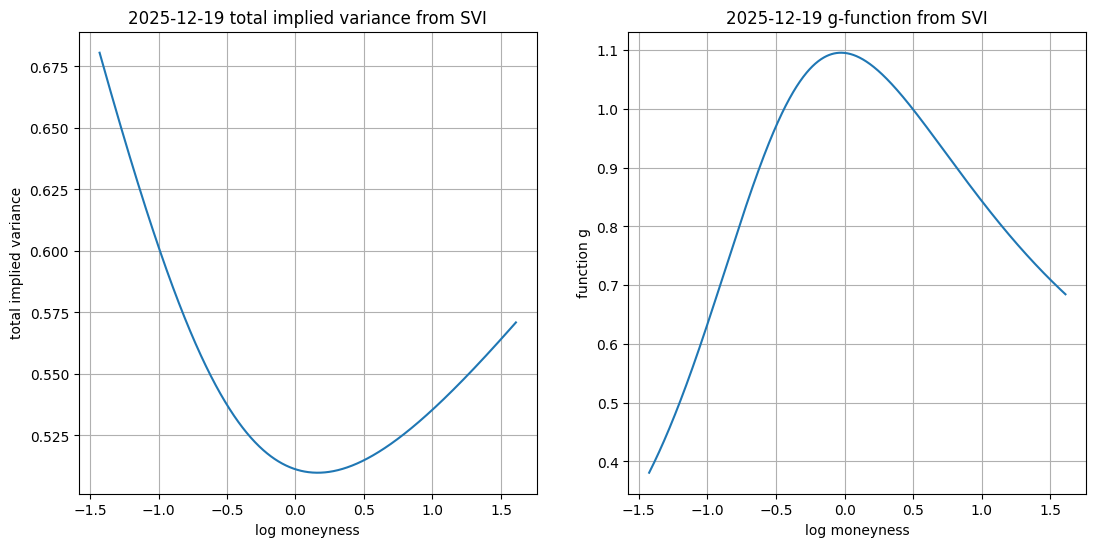

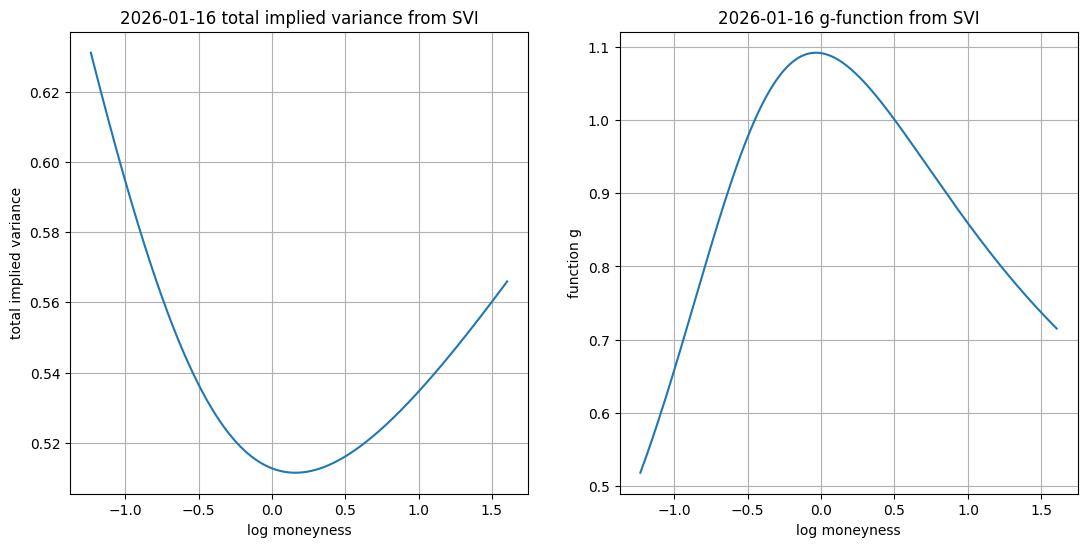

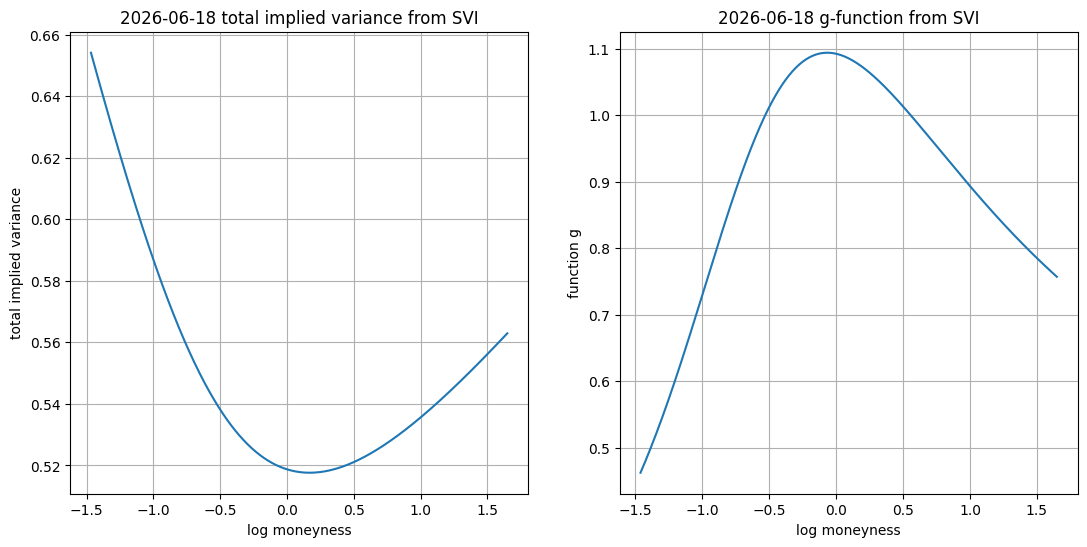

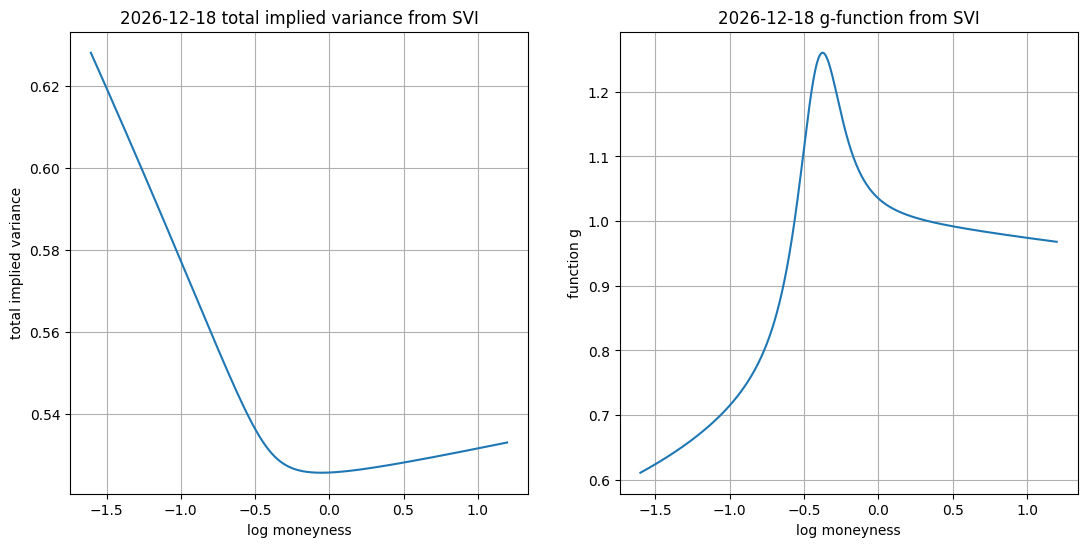

In [20]:
# check butterfly arbitrage
for i in range(0, len(Implied_Volatility_via_stochastic_model['implied_volatility_surface'])):
    data_initial = Implied_Volatility_via_stochastic_model['implied_volatility_surface'][i]
    time = data_initial['expiry_date_in_act365_year_fraction']
    F = data_initial['reference_forward']
    DF = data_initial['reference_discount_factor']
    strikes = np.array(data_initial['strikes'])
    mid_IV = np.array(data_initial['mid_implied_volatilities'])
    s= Implied_Volatility['reference_spot']
    expiry_date = data_initial['expiry_date']
    set_param = data_initial['set_param_raw']
    coef = 1.8
    
    X = np.linspace(np.log(strikes[0]/F) * coef, np.log(strikes[-1]/F) * coef, 1000)

    a = get_g_function_for_butterfly_arbitrage(X, set_param, expiry_date, coef, time, graph=True, N=1000)

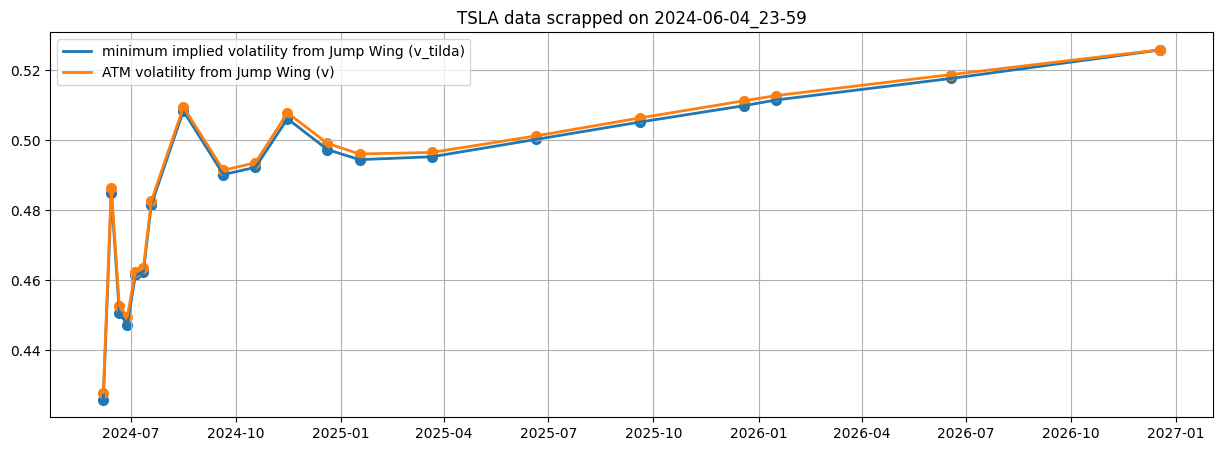

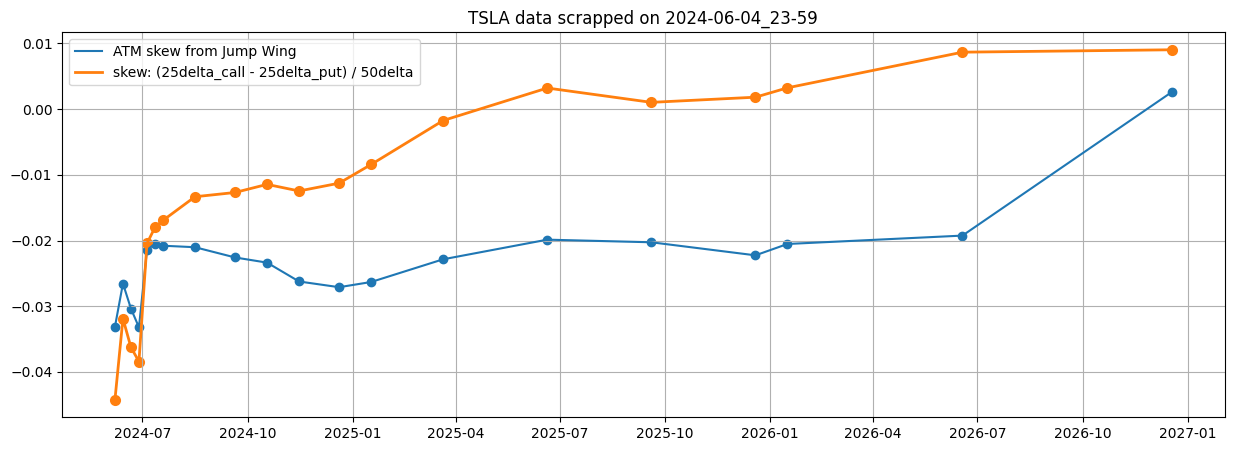

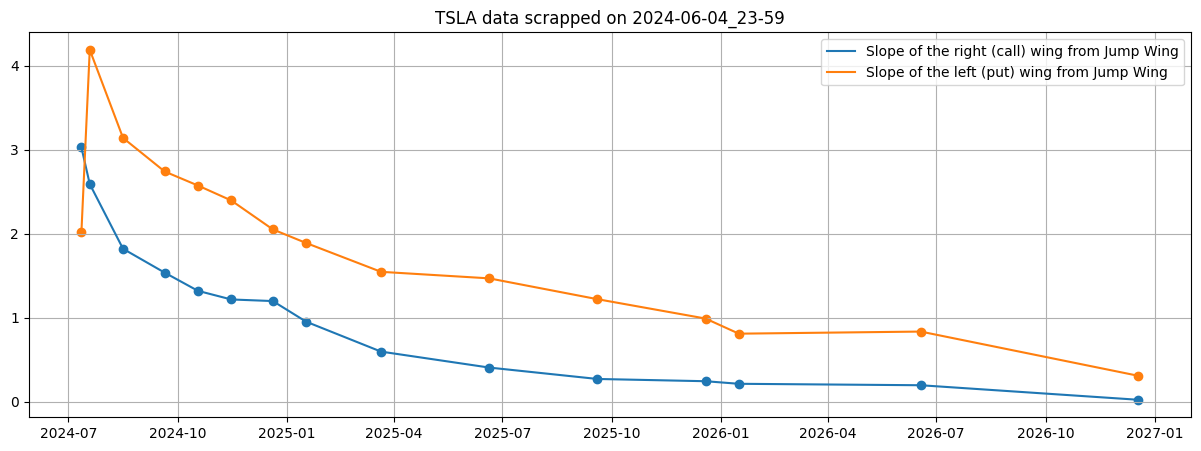

In [21]:
# checking the dependency of Jump Wing parameters
w, v, psi, p, c, v_tilda = get_jump_wing_param(Implied_Volatility_via_stochastic_model)
curvature_put, curvature_call = get_curvature(Implied_Volatility_via_stochastic_model)
vol_min, vol, skew_without_div, skew_with_div = get_skew(Implied_Volatility_via_stochastic_model)
expiry_date_list= np.delete(options_data["expiryDate"].unique(), 0).astype('datetime64')
expiry_date_list= np.delete(expiry_date_list, 0).astype('datetime64')
expiry_date_list= options_data["expiryDate"].unique().astype('datetime64')

plt.figure(figsize = (15,5))
plt.plot(expiry_date_list, np.sqrt(v_tilda), label = 'minimum implied volatility from Jump Wing (v_tilda)', linewidth=2)
plt.plot(expiry_date_list, np.sqrt(v), label = 'ATM volatility from Jump Wing (v)', linewidth=2)
plt.scatter(expiry_date_list, np.sqrt(v_tilda), linewidth=2)
plt.scatter(expiry_date_list, np.sqrt(v), linewidth=2)
plt.title(ticker + ' data scrapped on ' + data_date)
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize = (15,5))
plt.plot(expiry_date_list, psi, label = 'ATM skew from Jump Wing')
plt.scatter(expiry_date_list, psi)
plt.plot(expiry_date_list, skew_with_div, label = 'skew: (25delta_call - 25delta_put) / 50delta', linewidth=2)
plt.scatter(expiry_date_list, skew_with_div, linewidth=2)
plt.title(ticker + ' data scrapped on ' + data_date)
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize = (15,5))
plt.plot(expiry_date_list[5:], c[5:], label = 'Slope of the right (call) wing from Jump Wing' )
plt.plot(expiry_date_list[5:], p[5:], label = 'Slope of the left (put) wing from Jump Wing')
plt.scatter(expiry_date_list[5:], c[5:])
plt.scatter(expiry_date_list[5:], p[5:])
plt.title(ticker + ' data scrapped on ' + data_date)
plt.legend()
plt.grid()
plt.show()

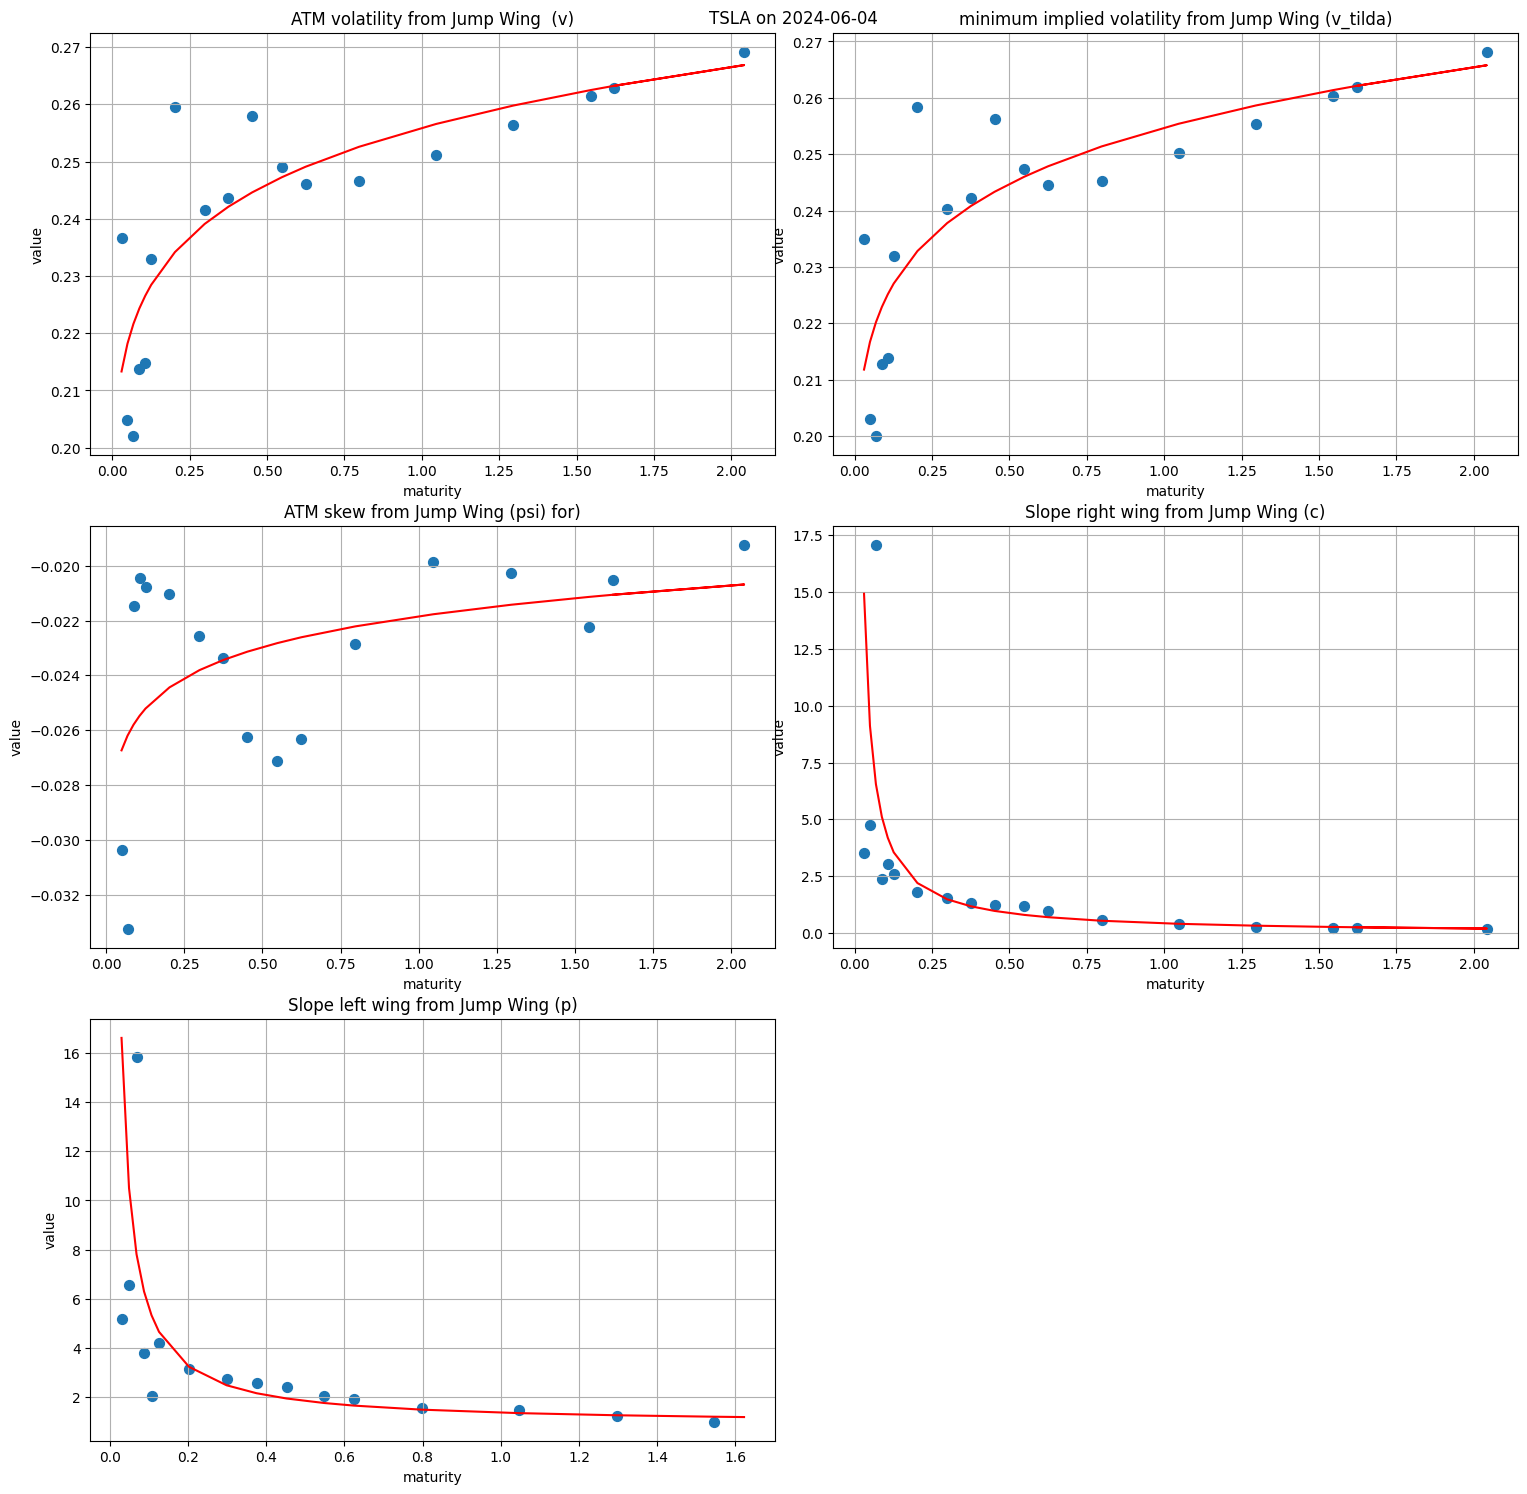

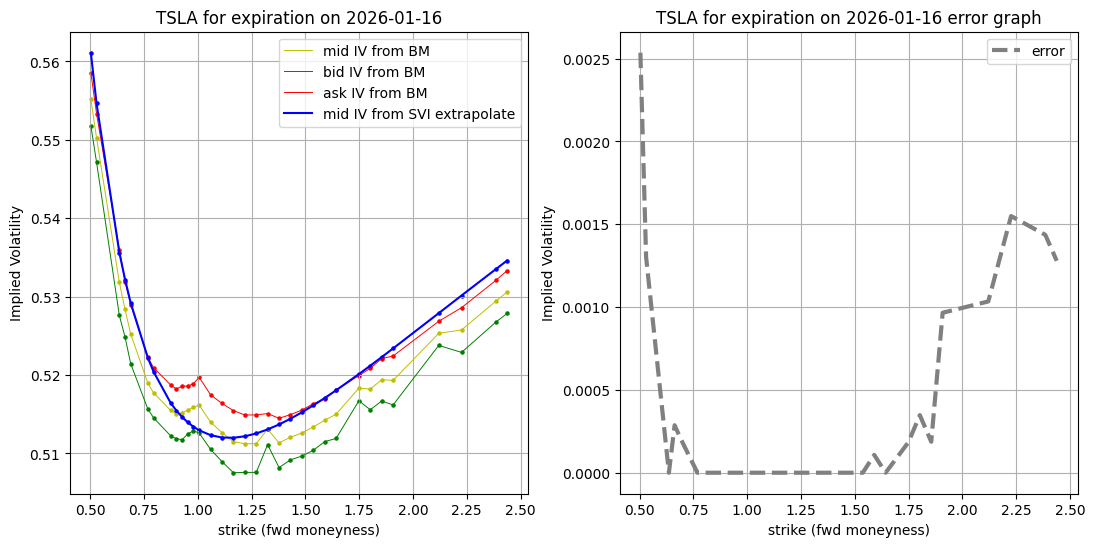

In [22]:
# build regression
start_v = 1
start_v_tilda = 1
end_psi = 17
start_c = 1
start_p = 1
timeteable = 17
expire_time = Implied_Volatility_via_stochastic_model['implied_volatility_surface'][timeteable]['expiry_date_in_act365_year_fraction']
_,_,_,_,_,w_volatility = get_SVI_extrapolation(Implied_Volatility_via_stochastic_model, expire_time, timeteable, start_v, start_v_tilda, end_psi, start_c, start_p,0, 1, type_reggresion = 'polynomial', plot_graph=True)
lines_2D_SVI_example(ticker, Implied_Volatility_via_stochastic_model, timeteable, w_volatility)

In [23]:
# build volatility surface
ranger = range(27,51)
lister_time = [0.7, 0.9, 1.1, 1.2, 1.4, 1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.6] + list(np.array(ranger) / 10)
lister = [13,15,17,18,20,22, 23,24,25,27,28,29,30,32] + list(range(33, 33 + len(ranger)))
t_grid, x_grid, volatility_grid = get_grids_for_volatility_surface(start_v, start_v_tilda, end_psi, start_c, start_p, Implied_Volatility_via_stochastic_model, lister_time, lister)

t_grid_1 = []
x_grid_1 = []
volatility_grid_1 = []
for i in lister:
    t_grid_1.append(t_grid[i])
    x_grid_1.append(x_grid[i])
    volatility_grid_1.append(volatility_grid[i])

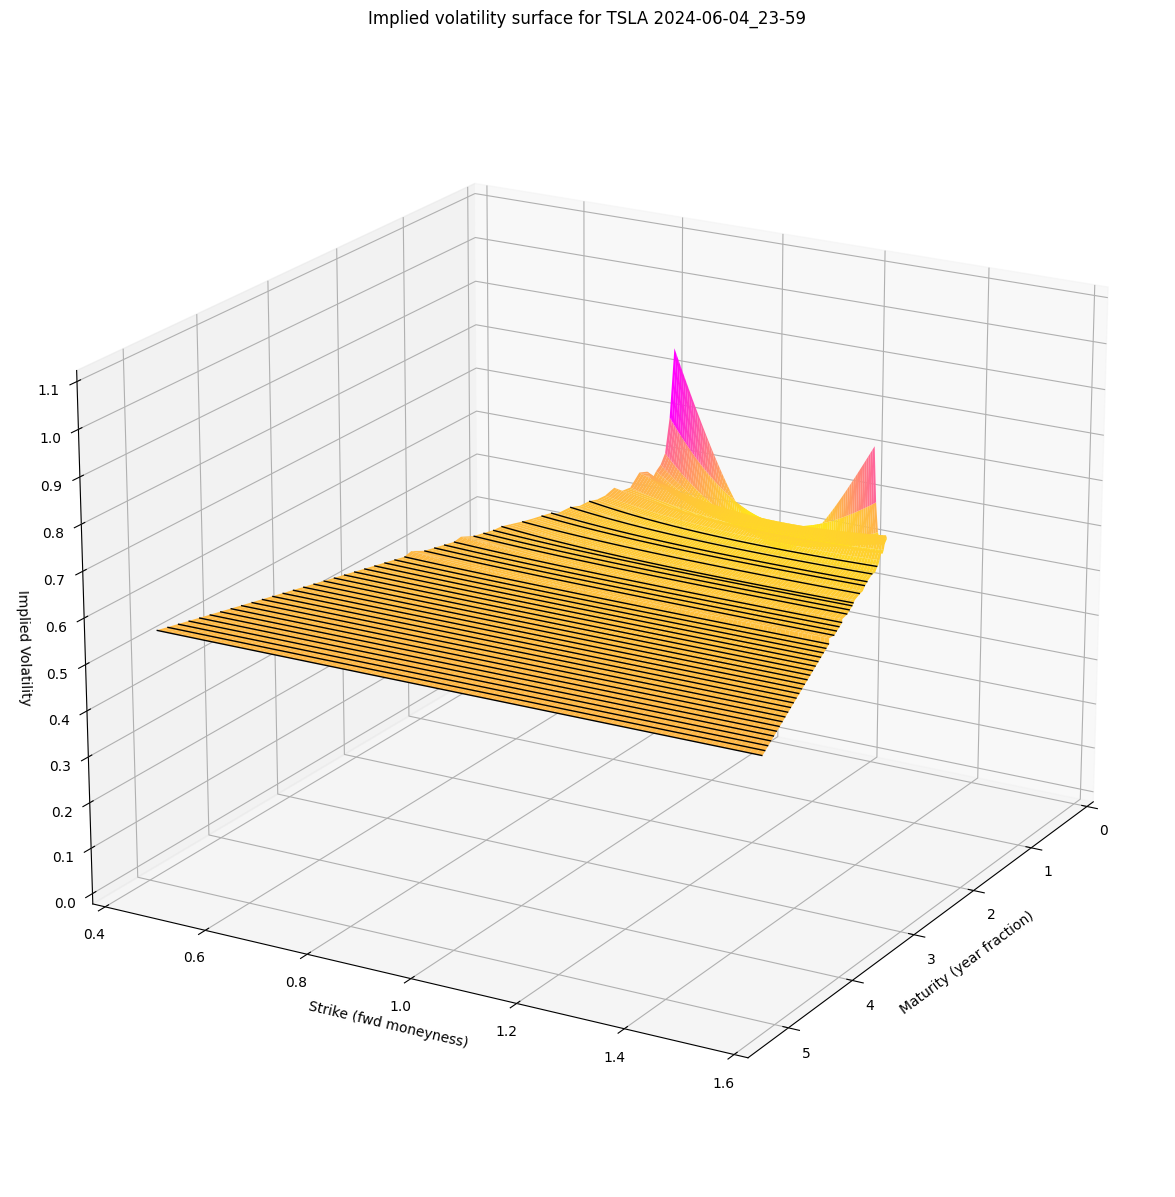

In [24]:
fig = plt.figure(figsize=(40, 15))
ax_3d = fig.add_subplot(projection='3d')
ax_3d.plot_surface(t_grid, np.array(x_grid), np.array(volatility_grid), rstride=1, cstride=1, cmap='spring_r')
ax_3d.plot_wireframe(t_grid_1, np.array(x_grid_1), np.array(volatility_grid_1), rstride=1, cstride=0, linewidth=1, edgecolors='k')
# ax_3d.contourf(t_grid, np.array(x_grid), np.array(volatility_grid), rstride=1, cstride=1, cmap='cool')
# ax_3d.set_title(ticker)
ax_3d.set_title('Implied volatility surface for ' + ticker + ' ' + data_date)
ax_3d.set_xlabel(r'Maturity (year fraction)')
ax_3d.axes.set_xlim3d(left=0, right=5.5)
ax_3d.set_ylabel(r'Strike (fwd moneyness)')
ax_3d.axes.set_ylim3d(bottom=0.4, top=1.6)
ax_3d.set_zlabel(r'Implied Volatility')
ax_3d.axes.set_zlim3d(bottom=0.0, top=1.1) 
ax_3d.set_zticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1])
ax_3d.grid()
ax_3d.view_init(20, 30)